In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets

## **K Means clustering**

In [3]:
df = pd.DataFrame(data = {
                        "Feature 1": [2,3,3.5,8,8.5,9,1,1.5],
                        "Feature 2": [3,3.5,3,8,8.5,8,2,2.5],
                        "Feature 3": [1.5,2,2.5,7.5,8,8.5,1,1.5]
                         })
X = df.values
X

array([[2. , 3. , 1.5],
       [3. , 3.5, 2. ],
       [3.5, 3. , 2.5],
       [8. , 8. , 7.5],
       [8.5, 8.5, 8. ],
       [9. , 8. , 8.5],
       [1. , 2. , 1. ],
       [1.5, 2.5, 1.5]])

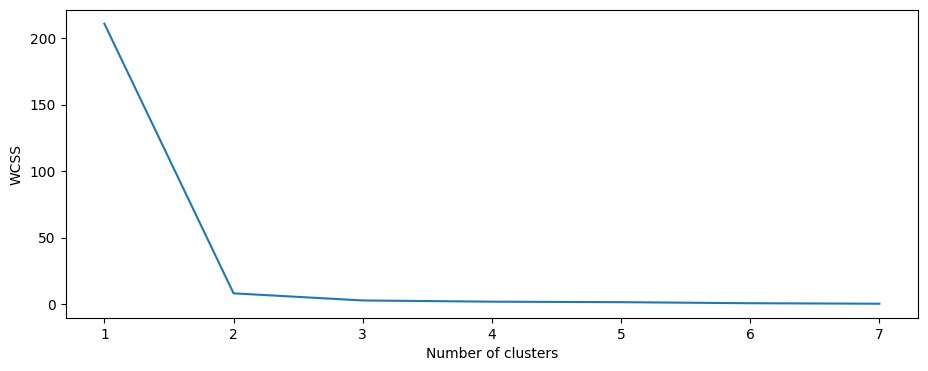

In [4]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # random_state = 42 : This is a seed for the random number generator to ensure that the results are reproducible.
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
	# kmeans.inertia_: This attribute of the fitted KMeans model returns the WCSS value, which is then appended to the `wcss` list.The algorithm also computes the inertia (or WCSS) for the final clustering, which is stored in `kmeans.inertia_`.

# plotting the chart
fig, ax = plt.subplots(figsize = (11,4))
ax.plot(range(1, 8), wcss)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS') 
plt.show()

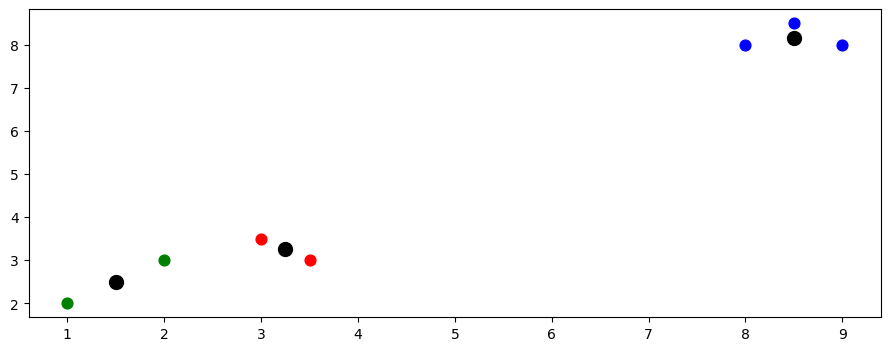

In [5]:
# From The graph above, we shall choose K clusters as 3
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

fig , ax = plt.subplots(figsize =(11,4))
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

In [6]:
# From The graph above, we shall choose K clusters as 3
k = 3
centroids = X[:k]
iter = 10
wcss = 0

for i in range(iter):
	distances = np.sqrt(((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=-1))
	
	labels = np.argmin(distances, axis = 1)
	
	centroids_new = np.array([X[labels == i].mean(axis =0) for i in range(k)])
	
	if np.all(centroids_new == centroids):
		break
		
	centroids = centroids_new 

In [7]:
centroids

array([[1.5       , 2.5       , 1.33333333],
       [3.25      , 3.25      , 2.25      ],
       [8.5       , 8.16666667, 8.        ]])